<a href="https://colab.research.google.com/github/nikenyudha/telco-customer-churn-analysis/blob/main/ML_telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem:**

Telecommunications companies often face a high churn rate, where customers cancel their subscriptions and switch to competitors. Retaining existing customers is generally more cost-effective than acquiring new ones.

**This creates several major problems:**

1. The cost of acquiring new customers is higher than retaining existing ones. So high churn = financial loss.

2. Loss of recurring revenue, since customers who churn usually cancel their monthly subscriptions.

3. Brand image and customer satisfaction decline, as churn often indicates issues with service quality, pricing, or customer support.

4. Difficulty predicting future revenue, as the number of active customers becomes unstable.

5. Missed opportunities for cross-selling and upselling (e.g., internet + TV + phone bundles) because customers are no longer loyal.

# **Objective**

The objective of this project is to develop a machine learning model that predicts customer churn based on demographic and behavioral data. By identifying customers who are likely to leave, the company can implement targeted retention strategies to reduce churn rate and increase customer lifetime value.

# **Approach**

**Data Overview**
*   Review the provided customer data to familiarize yourself with the variables and their structure.
*   Check the data quality, missing values, and potential errors.
*   Determine if any data pre-processing is necessary.

**Exploratory Data Analysis (EDA)**
*   Analyze the distribution of the variables to identify any outliers or anomalies.
*   Investigate the relationship between variables to identify any correlations or patterns.
*   Visualize the data to gain insights into the behavior and characteristics of the customers.

**Data Preprocessing & Feature Engineering**
*   Clean the data by handling missing values, converting variables to appropriate data types, and addressing any data quality issues.
*   Select the most important variables for building the predictive model.

**Model Building & Evaluation**
* Build a predictive model that can identify customers who are at risk of leaving the company.

**Insights & Recommendations**
* Identify customers who are most likely to churn and understand the reasons behind their decision.
* Create some recommendations for the company.

# **Import important Dataset**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, RobustScaler

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
!pip install kaggle
from google.colab import files
files.upload()  # upload kaggle.json dari akun Kaggle kamu

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# download dataset
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip

import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 459MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Overview

In [3]:
df.shape

(7043, 21)

In [4]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#changes totalcharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [7]:
#changes SeniorCitizen Dtype to object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [8]:
#changes Churn to int
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [9]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,0


In [12]:
df.select_dtypes(include=np.number).columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [13]:
#numeric variables
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7032.000000,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000
Churn,7043.000000,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000


In [20]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]


    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols = [col for col in cat_cols if col not in "Churn"]

for col in cat_cols:
    print(df[col].value_counts())

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1
gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No 

In [21]:
#categorical variabels
def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
    print("______________________________________________")
    if plot:
        sns.countplot(x=df[col_name], data=df)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df,col)


        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
______________________________________________
               SeniorCitizen      Ratio
SeniorCitizen                          
0                       5901  83.785319
1                       1142  16.214681
______________________________________________
         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
______________________________________________
            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
______________________________________________
              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
______________________________________________
                  MultipleLines      Ratio
MultipleLines                             
No                     

In [22]:
# for clean table
gender_ratio = df['gender'].value_counts(normalize=True).mul(100).round(2)
gender_ratio = gender_ratio.rename("percentage").reset_index()
gender_ratio.columns = ['gender', 'percentage']
print(gender_ratio)


   gender  percentage
0    Male       50.48
1  Female       49.52



--- gender ---
        Count  Ratio (%)
gender                  
Male     3555   50.47565
Female   3488   49.52435
______________________________________________


/tmp/ipython-input-1538695498.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=df, palette="Set2")


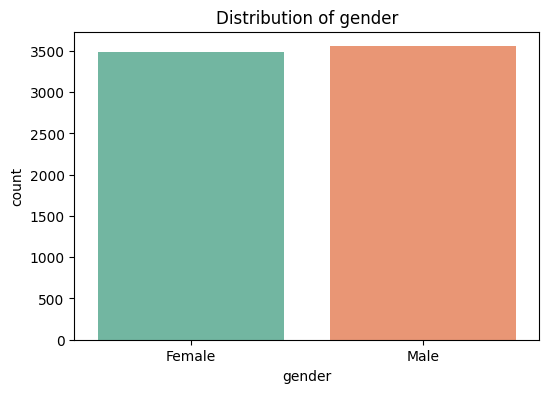


--- Partner ---
         Count  Ratio (%)
Partner                  
No        3641   51.69672
Yes       3402   48.30328
______________________________________________


/tmp/ipython-input-1538695498.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=df, palette="Set2")


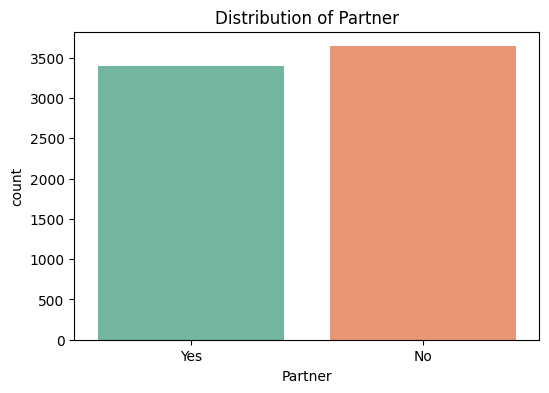


--- Dependents ---
            Count  Ratio (%)
Dependents                  
No           4933  70.041176
Yes          2110  29.958824
______________________________________________


/tmp/ipython-input-1538695498.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=df, palette="Set2")


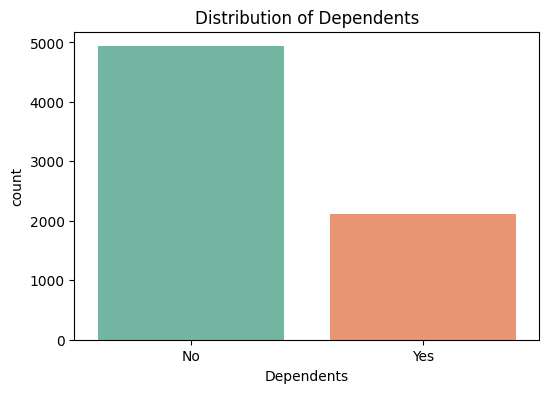

/tmp/ipython-input-1538695498.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=df, palette="Set2")



--- SeniorCitizen ---
               Count  Ratio (%)
SeniorCitizen                  
0               5901  83.785319
1               1142  16.214681
______________________________________________


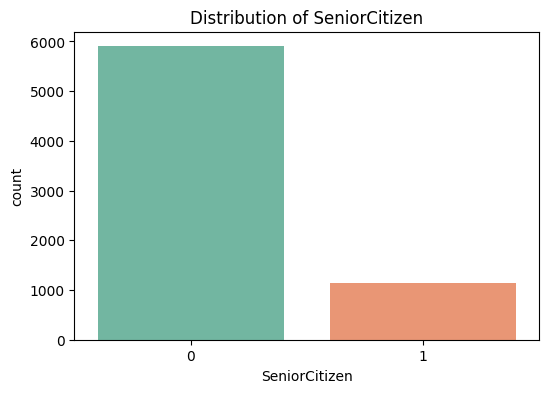


--- PhoneService ---
              Count  Ratio (%)
PhoneService                  
Yes            6361  90.316626
No              682   9.683374
______________________________________________


/tmp/ipython-input-1538695498.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=df, palette="Set2")


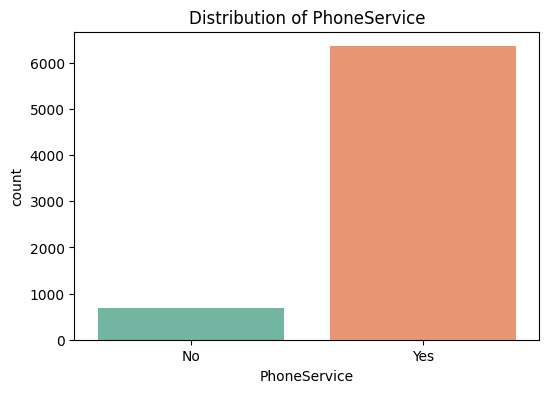


--- MultipleLines ---
                  Count  Ratio (%)
MultipleLines                     
No                 3390  48.132898
Yes                2971  42.183729
No phone service    682   9.683374
______________________________________________


/tmp/ipython-input-1538695498.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=df, palette="Set2")


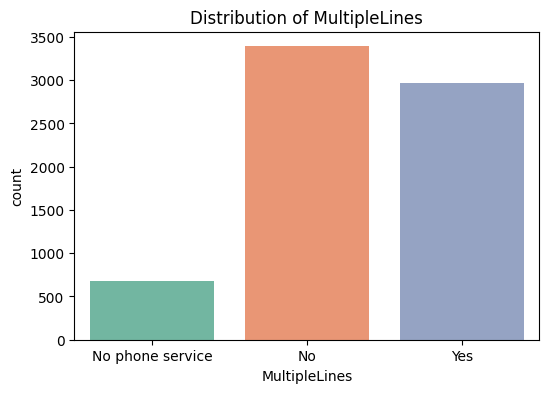

In [23]:
# variabel categorical
def cat_summary(df, col_name, plot=False):
    summary = pd.DataFrame({
        "Count": df[col_name].value_counts(),
        "Ratio (%)": 100 * df[col_name].value_counts() / len(df)
    })
    print(f"\n--- {col_name} ---")
    print(summary)
    print("______________________________________________")

    if plot:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col_name, data=df, palette="Set2")
        plt.title(f"Distribution of {col_name}")
        plt.show()

# Daftar variabel kategorikal yang ingin dianalisis
cat_cols = ["gender", "Partner", "Dependents", "SeniorCitizen","PhoneService","MultipleLines"]

# Jalankan untuk semua variabel
for col in cat_cols:
    cat_summary(df, col, plot=True)


In [24]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00


NOTE :

1) Most of the customers in our dataset are men.
2) Around 50% of customers have a partner (married)
3) Only 30% of total customers have dependents.
4) 90% of customers receive telephone service.
5) 53% of the 90% who receive telephone service do not have more than one line
6) 21% do not have an internet service provider
7) Most customers are on month-to-month contracts. There is a close number of customers on 1-year and 2-year contracts.
8) 60% of customers have paperless invoices
9) Around 26% of customers have left the platform in the last month
10) 16% of the dataset consists of older customers, so most of the customers in the data are young

In [26]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col)

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2

Looking at Tenure, 1-month customers are too many followed by 70-month-old customers.

In [ ]:
# Analyze the target variable with categorical variables
# Target variable analysis with numerical variables
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)


# Target variable analysis with categorical variables.
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

          tenure
Churn           
0      37.569965
1      17.979133


       MonthlyCharges
Churn                
0           61.265124
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094


gender
        TARGET_MEAN  Count     Ratio
gender                              
Female     0.269209   3488  49.52435
Male       0.261603   3555  50.47565


Partner
         TARGET_MEAN  Count     Ratio
Partner                              
No          0.329580   3641  51.69672
Yes         0.196649   3402  48.30328


Dependents
            TARGET_MEAN  Count      Ratio
Dependents                               
No             0.312791   4933  70.041176
Yes            0.154502   2110  29.958824


SeniorCitizen
               TARGET_MEAN  Count      Ratio
SeniorCitizen                               
0                 0.236062   5901  83.785319
1                 0.416813   1142  16.214681


PhoneService
              TARGET_MEAN  Count      Ratio
Phone

1) When we look at the relationship between Tenure and Churn, we see that customers who do not churn have been customers for longer
2) When monthlycharges and Churn are analyzed, customers with churn have higher average monthly payments

In [27]:
#correlation analysis
df[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


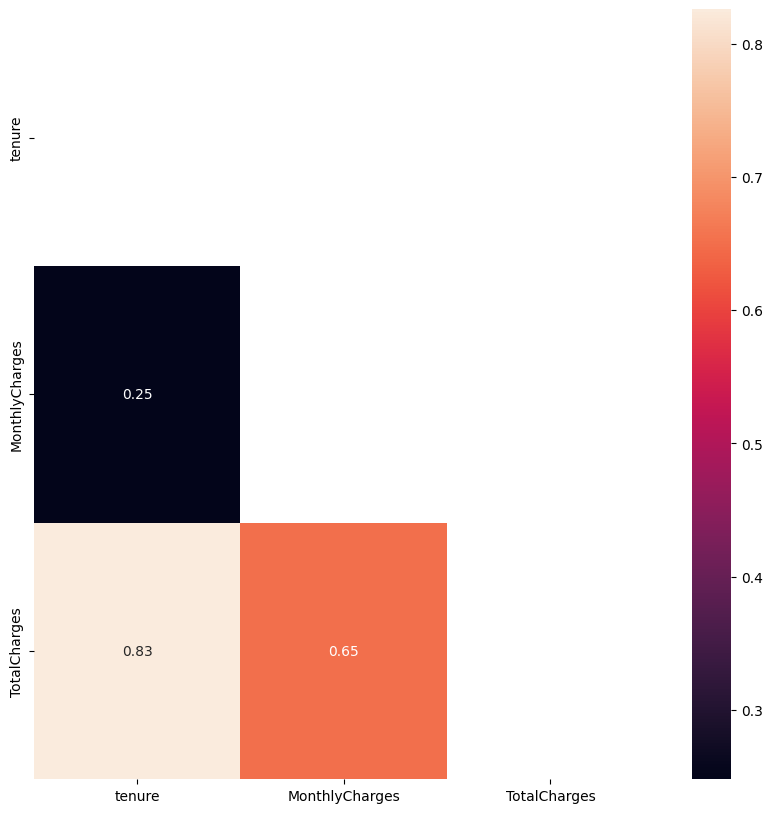

In [28]:
corr=df[num_cols].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr))   #korelasyon matirisinin üst kısmı gösterilmesin diye maske eklendi
corr = df[num_cols].corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True, mask=mask)
plt.show()

In [29]:
#examine outlier
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# Outlier Analysis and Suppression
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

tenure False
MonthlyCharges False
TotalCharges False


In [30]:
#check missing value
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11   0.16


In [31]:
df.isnull().sum()
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [32]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

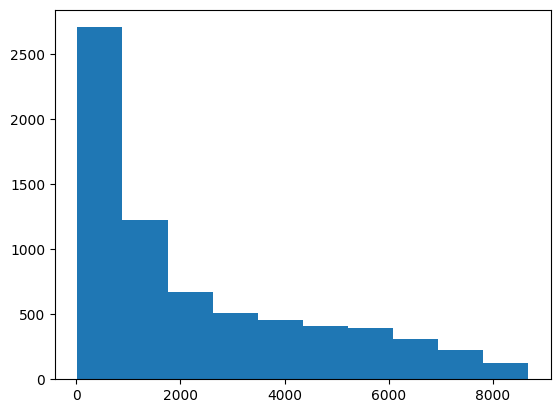

In [35]:
plt.hist(df['TotalCharges'])

In [36]:
totalcharges_mean = df['TotalCharges'].mean()
totalcharges_mean

np.float64(2283.300440841866)

In [37]:
totalcharges_median = df['TotalCharges'].median()
totalcharges_median

1397.475

<Axes: ylabel='TotalCharges'>

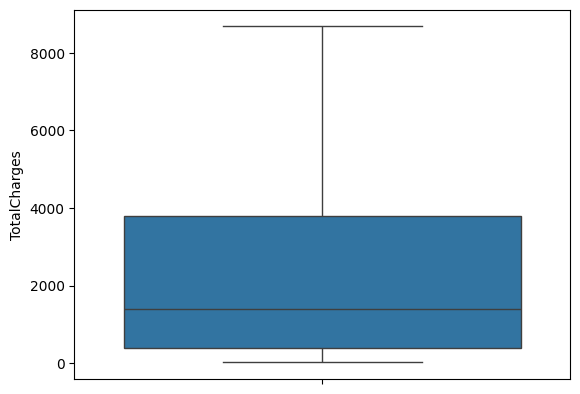

In [38]:
sns.boxplot(df['TotalCharges'])

<Axes: ylabel='MonthlyCharges'>

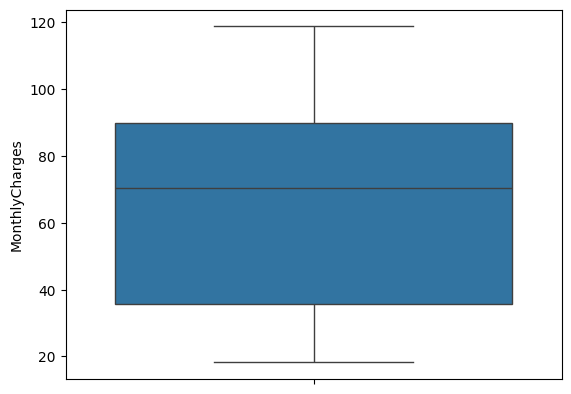

In [39]:
sns.boxplot(df['MonthlyCharges'])

# Base model Setup

In [41]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'SeniorCitizen',
 'PhoneService',
 'MultipleLines']

In [42]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [43]:
y = dff["Churn"]
X = dff.drop(["Churn","customerID"], axis=1)

In [49]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 973, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'No'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 973, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'DSL'


In [50]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ---------------------------
# 1. Tentukan kolom kategorikal
# ---------------------------
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# ---------------------------
# 2. Buat preprocessor
# ---------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="passthrough"  # biar kolom numerik tetap dipakai
)

# ---------------------------
# 3. Definisikan model
# ---------------------------
models = [
    ('LR', LogisticRegression(max_iter=1000, random_state=12345)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=12345)),
    ('RF', RandomForestClassifier(random_state=12345)),
    ('XGB', XGBClassifier(random_state=12345, use_label_encoder=False, eval_metric='logloss')),
    ('LightGBM', LGBMClassifier(random_state=12345))
]

# ---------------------------
# 4. Looping + cross validate
# ---------------------------
for name, model in models:
    clf = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    cv_results = cross_validate(
        clf, X, y, cv=10,
        scoring=["accuracy", "f1", "roc_auc", "precision", "recall"]
    )

    print(f"########## {name} ##########")
    print(f"Accuracy:  {cv_results['test_accuracy'].mean():.4f}")
    print(f"AUC:       {cv_results['test_roc_auc'].mean():.4f}")
    print(f"Recall:    {cv_results['test_recall'].mean():.4f}")
    print(f"Precision: {cv_results['test_precision'].mean():.4f}")
    print(f"F1:        {cv_results['test_f1'].mean():.4f}\n")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

########## LR ##########
Accuracy:  0.8033
AUC:       0.8453
Recall:    0.5500
Precision: 0.6546
F1:        0.5975

########## KNN ##########
Accuracy:  0.7617
AUC:       0.7476
Recall:    0.4462
Precision: 0.5663
F1:        0.4986

########## CART ##########
Accuracy:  0.7230
AUC:       0.6503
Recall:    0.4907
Precision: 0.4791
F1:        0.4843

########## RF ##########
Accuracy:  0.7921
AUC:       0.8234
Recall:    0.4976
Precision: 0.6420
F1:        0.5603



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:31:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:31:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:31:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:31:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:31:18] WARNING: /w

########## XGB ##########
Accuracy:  0.7851
AUC:       0.8214
Recall:    0.5174
Precision: 0.6149
F1:        0.5616

[LightGBM] [Info] Number of positive: 1682, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6328, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265803 -> initscore=-1.016023
[LightGBM] [Info] Start training from score -1.016023


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6328, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265803 -> initscore=-1.016023
[LightGBM] [Info] Start training from score -1.016023


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1683, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265919 -> initscore=-1.015429
[LightGBM] [Info] Start training from score -1.015429


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238
########## LightGBM ##########
Accuracy:  0.7955
AUC:       0.8360
Recall:    0.5265
Precision: 0.6421
F1:        0.5781



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [51]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ---------------------------
# 1. Pilih kolom kategorikal
# ---------------------------
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="passthrough"
)

# ---------------------------
# 2. Definisikan model
# ---------------------------
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=12345)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=12345)),
    ('Random Forest', RandomForestClassifier(random_state=12345)),
    ('XGBoost', XGBClassifier(random_state=12345, use_label_encoder=False, eval_metric='logloss')),
    ('LightGBM', LGBMClassifier(random_state=12345))
]

# ---------------------------
# 3. Simpan hasil ke DataFrame
# ---------------------------
results = []

for name, model in models:
    clf = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    cv_results = cross_validate(
        clf, X, y, cv=10,
        scoring=["accuracy", "f1", "roc_auc", "precision", "recall"]
    )

    results.append({
        "Model": name,
        "Accuracy": cv_results['test_accuracy'].mean(),
        "ROC AUC": cv_results['test_roc_auc'].mean(),
        "Precision": cv_results['test_precision'].mean(),
        "Recall": cv_results['test_recall'].mean(),
        "F1": cv_results['test_f1'].mean()
    })

df_results = pd.DataFrame(results)
df_results = df_results.round(4)  # biar lebih rapi

print(df_results)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 1682, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6328, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265803 -> initscore=-1.016023
[LightGBM] [Info] Start training from score -1.016023


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6328, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265803 -> initscore=-1.016023
[LightGBM] [Info] Start training from score -1.016023


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1683, number of negative: 4646
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265919 -> initscore=-1.015429
[LightGBM] [Info] Start training from score -1.015429


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1682, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265761 -> initscore=-1.016238
[LightGBM] [Info] Start training from score -1.016238
                 Model  Accuracy  ROC AUC  Precision  Recall      F1
0  Logistic Regression    0.8033   0.8453     0.6546  0.5500  0.5975
1                  KNN    0.7617   0.7476     0.5663  0.4462  0.4986
2        Decision Tree    0.7230   0.6503     0.4791  0.4907  0.4843
3        Random Forest    0.7921   0.8234     0.6420  0.4976  0.5603
4              XGBoost    0.7851   0.8214     0.6149  0.5174  0.5616
5             LightGBM    0.7955

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Feature Engineering

In [52]:
#create new var
# Create an annual categorical variable from the variable Tenure
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"


# Specify customers with a 1 or 2 year contract as Engaged
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# People who do not receive any support, backup or protection
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# Young customers with a monthly contract
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)


# Total number of services received by the person
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


# People who receive any streaming service
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Does the person make automatic payments?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# average monthly payment
df["NEW_AVG_Charges"] = df["TotalCharges"] / df["tenure"]

# Increase in current price compared to average price
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Fee per service
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)


In [53]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0-1 Year,0,1,1,1,0,0,29.850000,1.00000,14.9250
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,2-3 Year,1,1,0,3,0,0,55.573529,0.97583,14.2375


#encoding

In [54]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)

df.head()


Observations: 7032
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 7


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,0-1 Year,0,1,1,1,0,0,29.850000,1.000000,14.9250
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,2-3 Year,1,1,0,3,0,0,55.573529,0.975830,14.2375
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,0-1 Year,0,1,1,3,0,0,54.075000,1.004178,13.4625
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,3-4 Year,1,1,0,3,0,1,40.905556,0.967034,10.5750
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,0-1 Year,0,1,1,1,0,0,75.825000,1.072489,35.3500


In [55]:
# One-Hot Encoding
# Updating the cat_cols list
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,True,True,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,True,False,False,False,True,True,False,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,False,True,False,False,True,True,False,False,True
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,True,True,False,False


# Modeling

In [56]:
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)


models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

########## LR ##########
Accuracy: 0.7999
Auc: 0.84
Recall: 0.5185
Precision: 0.6567
F1: 0.579
########## KNN ##########
Accuracy: 0.7698
Auc: 0.7533
Recall: 0.4644
Precision: 0.5851
F1: 0.5168
########## CART ##########
Accuracy: 0.727
Auc: 0.656
Recall: 0.5003
Precision: 0.4876
F1: 0.4935
########## RF ##########
Accuracy: 0.791
Auc: 0.8295
Recall: 0.4938
Precision: 0.639
F1: 0.5566
########## XGB ##########
Accuracy: 0.7864
Auc: 0.8216
Recall: 0.512
Precision: 0.6199
F1: 0.5603
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1430
[LightGBM] [Info] Number of data points in the train set: 6328, number of used features: 44
[LightGBM] [I

In [ ]:
#random forest
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8, None], # Maximum depth of the tree
             "max_features": [3, 5, 7, "auto"], # Number of features to consider when looking for the best split
             "min_samples_split": [2, 5, 8, 15, 20], # Minimum number of instances required to split a node
             "n_estimators": [100, 200, 500]} # Tree count

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

rf_best_grid.best_params_ # {'max_depth': None, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 100}
#rf_final = rf_model.set_params(rf_best_grid.best_params_, random_state=17).fit(X, y)

rf_final = RandomForestClassifier(max_depth=None, max_features=7,min_samples_split=15,n_estimators=100,random_state=17).fit(X, y)
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1","recall","precision", "roc_auc" ])
cv_results['test_accuracy'].mean()
cv_results['test_roc_auc'].mean()
cv_results['test_recall'].mean()
cv_results['test_precision'].mean()
cv_results['test_f1'].mean()


Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


# **Data Understanding**

### Make Some Plot

(array([4.367e+03, 1.268e+03, 9.830e+02, 4.170e+02, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([1.200000e+01, 2.245360e+03, 4.478720e+03, 6.712080e+03,
        8.945440e+03, 1.117880e+04, 1.341216e+04, 1.564552e+04,
        1.787888e+04, 2.011224e+04, 2.234560e+04]),
 <a list of 10 Patch objects>)

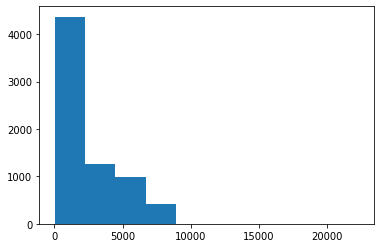

In [ ]:
plt.hist(df['totalcharges'])

(array([1185.,  507.,  235.,  663.,  577.,  901.,  979.,  886.,  784.,
         326.]),
 array([ 12.   ,  22.675,  33.35 ,  44.025,  54.7  ,  65.375,  76.05 ,
         86.725,  97.4  , 108.075, 118.75 ]),
 <a list of 10 Patch objects>)

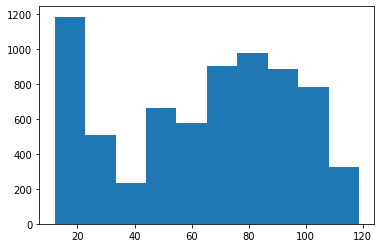

In [ ]:
plt.hist(df['monthlycharges'])

(array([2.186e+03, 1.024e+03, 8.310e+02, 7.610e+02, 8.320e+02, 1.406e+03,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  1. ,  12.9,  24.8,  36.7,  48.6,  60.5,  72.4,  84.3,  96.2,
        108.1, 120. ]),
 <a list of 10 Patch objects>)

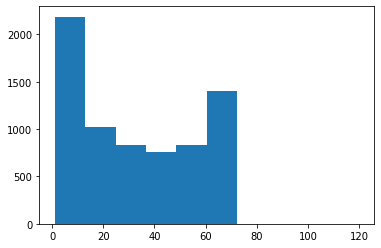

In [ ]:
plt.hist(df['tenure'])

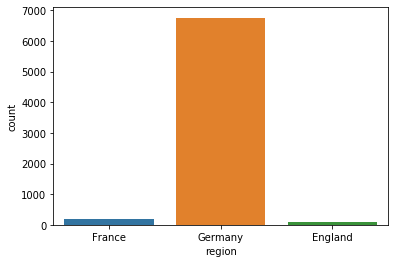

In [ ]:
sns.countplot(df['region'])

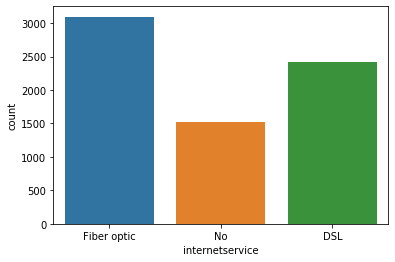

In [ ]:
sns.countplot(df['internetservice'])

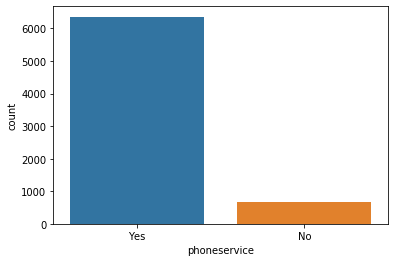

In [ ]:
sns.countplot(df['phoneservice'])

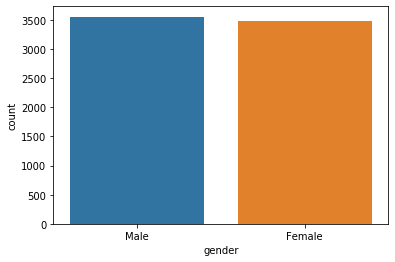

In [ ]:
sns.countplot(df['gender'])

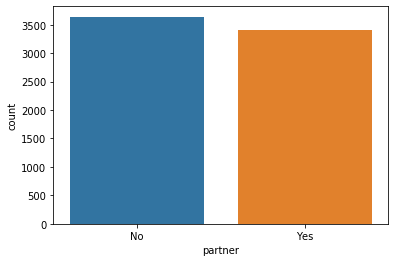

In [ ]:
sns.countplot(df['partner'])

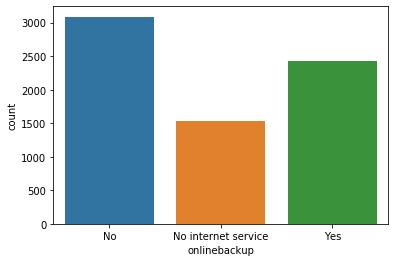

In [ ]:
sns.countplot(df['onlinebackup'])

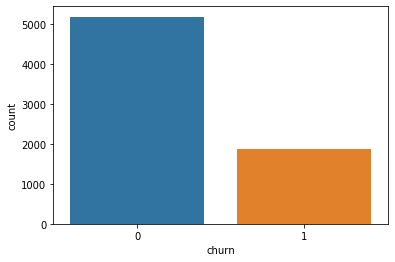

In [ ]:
sns.countplot(df['churn'])

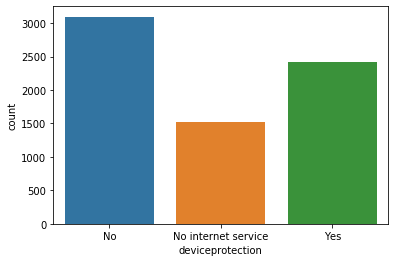

In [ ]:
sns.countplot(df['deviceprotection'])

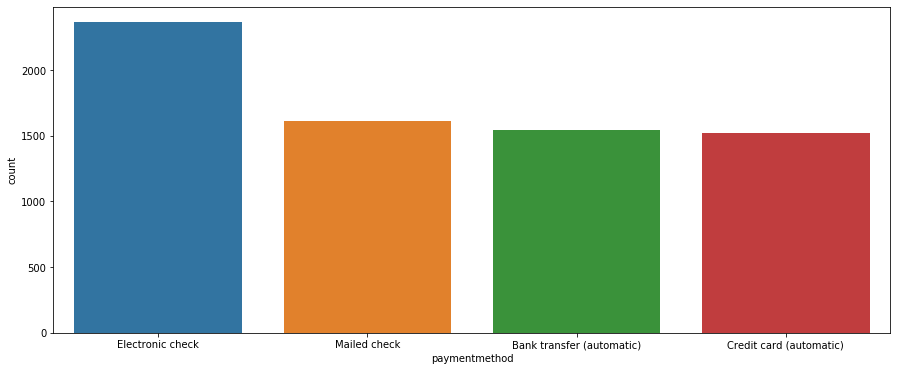

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['paymentmethod'])

# EDA

### Why customer Churn in the past ?

### Customer

##### Data Numerics

In [ ]:
df.describe().round()

,tenure,monthlycharges,totalcharges,churn
count,7043.0,7043.0,7043.0,7043.0
mean,32.0,65.0,2293.0,0.0
std,25.0,30.0,2315.0,0.0
min,1.0,12.0,12.0,0.0
25%,9.0,36.0,402.0,0.0
50%,29.0,70.0,1397.0,0.0
75%,55.0,90.0,3793.0,1.0
max,120.0,119.0,22346.0,1.0


**Note**
1. Ada beberapa customer yang bertahan lebih dari 55 bulan.
2. Rata rata monthly charges adalah 65.0
3. Rata rata total Charges adalah 2293.0

In [ ]:
df.describe(include='object')

,customerid,region,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,2,2,3,3,3,3,3,3,3,3,2,4
top,7730-CLDSV,Germany,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check
freq,1,6761,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,4171,2365


**Note**
1. Region yang paling banyak memakai telco adalah germany
2. Gender yang paling banyak menggunakan adalah male
3. internet service yang paling banyak dipakai adalah fiber optic
4. Payment method yang banyak digunakan adalah Electronic check

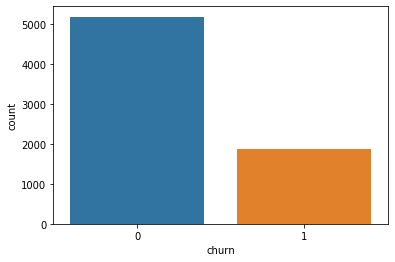

In [ ]:
sns.countplot(df['churn']) #0= no , 1= yes

In [ ]:
label = df['churn']

In [ ]:
df_corr = df

In [ ]:
df_corr.corr()

,tenure,monthlycharges,totalcharges,churn
tenure,1.000000,0.248350,0.815820,-0.350766
monthlycharges,0.248350,1.000000,0.644479,0.193502
totalcharges,0.815820,0.644479,1.000000,-0.195899
churn,-0.350766,0.193502,-0.195899,1.000000


Text(0.5, 1, 'Variable Correlation Heatmap')

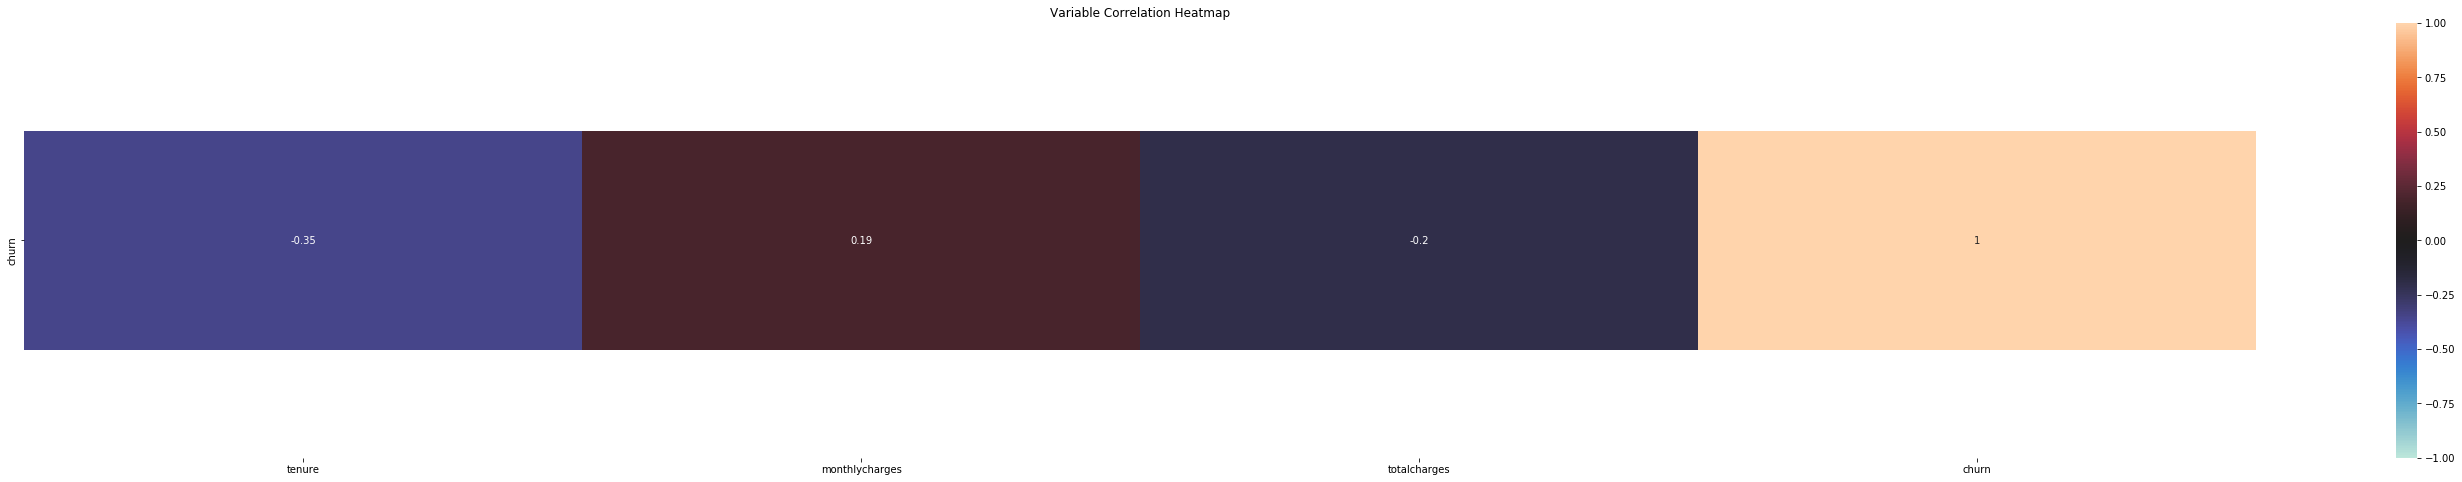

In [ ]:
corr = df_corr.corr()
corr2 = corr.iloc[-1:,:]

plt.figure(figsize=(50,8))
ax = sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Variable Correlation Heatmap')

**Note**
1. tenure mempunyai korelasi high negatif (-0.35)
2. monthlycharges mempunyai korelasi high positif (0.19)
3. totalcharges mempunyai korelasi low negatif(-0.2)
**tenure dan monthlycharges punya korelasi yang kuat terhadap churn.**

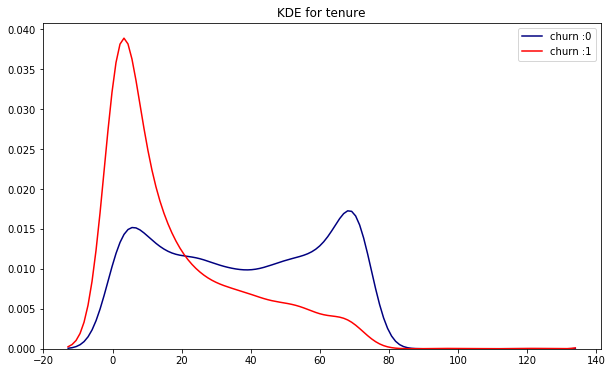

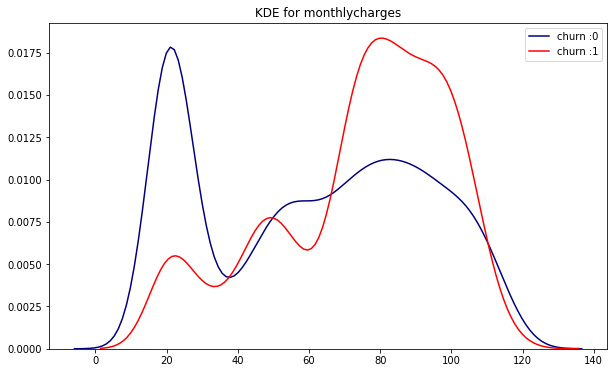

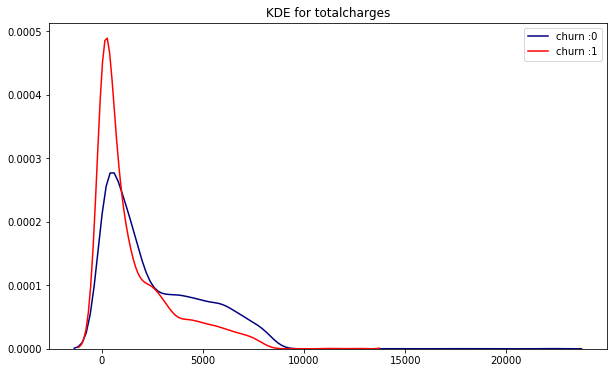

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(10,6))
    plt.title('KDE for {}'.format(feature))
    ax0 = sns.kdeplot(df[df['churn']== 0][feature],color = 'navy', label='churn :0')
    ax1 = sns.kdeplot(df[df['churn']== 1][feature],color = 'red', label='churn :1')
kdeplot('tenure')
kdeplot('monthlycharges')
kdeplot('totalcharges')

**note : ketika monthlycharges naik, churn juga meningkat**

#### Data Category

In [ ]:
df.describe(include='object')

,customerid,region,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,2,2,3,3,3,3,3,3,3,3,2,4
top,7730-CLDSV,Germany,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check
freq,1,6761,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,4171,2365


In [ ]:
pd.crosstab(df.churn, df.seniorcitizen, margins=True)

seniorcitizen,0,1,All
churn,,,
0,4508,666,5174
1,1393,476,1869
All,5901,1142,7043


In [ ]:
print ('jumlah senior yang churn adalah sekitar {}%'.format(476/1142*100))
print ('jumlah non-senior yang churn adalah sekitar {}%'.format(1393/5901*100))

jumlah senior yang churn adalah sekitar 41.68126094570928%
jumlah non-senior yang churn adalah sekitar 23.606168446026096%


In [ ]:
print ('jumlah senior yang tidak churn adalah sekitar {}%'.format(666/1142*100))
print ('jumlah non-senior yang tidak churn adalah sekitar {}%'.format(4508/5901*100))

jumlah senior yang tidak churn adalah sekitar 58.31873905429072%
jumlah non-senior yang tidak churn adalah sekitar 76.3938315539739%


**Note :  churn paling banyak dialami oleh senior daripada non-senior, dengan selisih sekitar kurang lebih 18%**

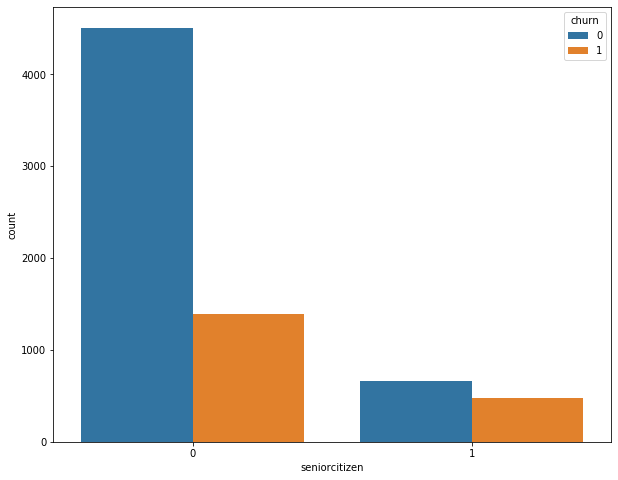

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(df.seniorcitizen, hue=df.churn) #0=no 1=yes

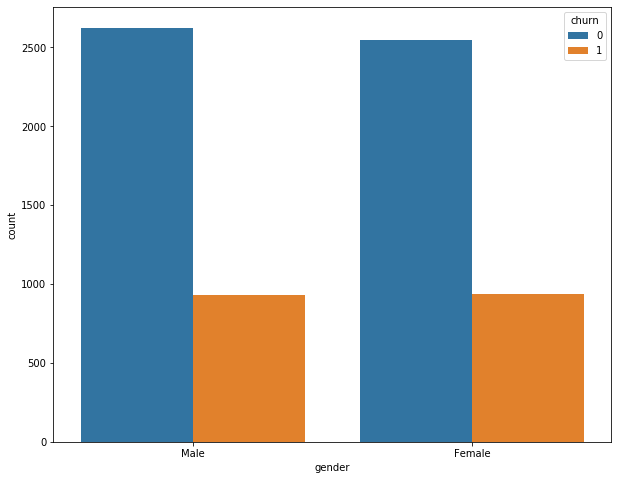

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(df.gender, hue=df.churn) #0=no 1=yes

In [ ]:
gender_charges = df.groupby(['gender'])[['totalcharges','monthlycharges']].mean().round()
gender_charges

,totalcharges,monthlycharges
gender,,
Female,2293.0,65.0
Male,2293.0,64.0


In [ ]:
gender_tenure = df.groupby(['gender'])['tenure'].mean().round()
gender_tenure

gender
Female    32.0
Male      33.0
Name: tenure, dtype: float64

**Note : Pengguna laki laki lebih banyak**

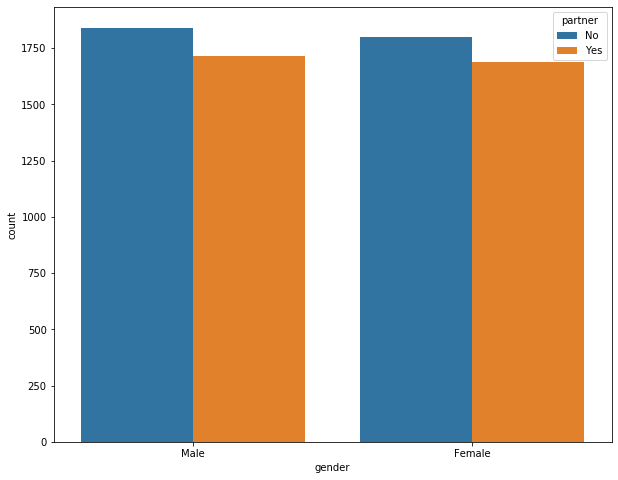

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(df.gender, hue=df.partner)

In [ ]:
 pd.crosstab(df.gender, df.partner,margins=True)

partner,No,Yes,All
gender,,,
Female,1800,1688,3488
Male,1841,1714,3555
All,3641,3402,7043


In [ ]:
print ('jumlah pria yang memiliki partner adalah sekitar {}%'.format(1714/3402*100))
print ('jumlah wanita yang memiliki partner adalah sekitar {}%'.format(1688/3402*100))
print ('\n===============================')
print ('jumlah pria yang tidak memiliki partner adalah sekitar {}%'.format(1841/3402*100))
print ('jumlah wanita yang tidak memiliki partner adalah sekitar {}%'.format(1800/3402*100))

jumlah pria yang memiliki partner adalah sekitar 50.38212815990594%
jumlah wanita yang memiliki partner adalah sekitar 49.61787184009406%

jumlah pria yang tidak memiliki partner adalah sekitar 54.11522633744856%
jumlah wanita yang tidak memiliki partner adalah sekitar 52.910052910052904%


In [ ]:
pd.crosstab(df.churn, [df.gender,df.partner],margins=True)

gender  Female        Male         All
partner     No   Yes    No   Yes      
churn                                 
0         1180  1369  1261  1364  5174
1          620   319   580   350  1869
All       1800  1688  1841  1714  7043

In [ ]:
print ('jumlah pria yang tidak memiliki partner dan churn adalah sekitar {}%'.format(580/1841*100))
print ('jumlah wanita yang tidak memiliki partner dan churn adalah sekitar {}%'.format(620/1800*100))

print ('\n===================================================================')

print ('jumlah pria yang memiliki partner dan churn adalah sekitar {}%'.format(350/1714*100))
print ('jumlah wanita yang memiliki partner dan churn adalah sekitar {}%'.format(391/1688*100))

print ('\n===================================================================')

print ('jumlah pria yang tidak memiliki partner dan tidak churn adalah sekitar {}%'.format(1261/1841*100))
print ('jumlah wanita yang tidak memiliki partner dan tidak churn adalah sekitar {}%'.format(1180/1800*100))

print ('\n===================================================================')

print ('jumlah pria yang memiliki partner dan tidak churn adalah sekitar {}%'.format(1364/1714*100))
print ('jumlah wanita yang memiliki partner dan tidak churn adalah sekitar {}%'.format(1369/1688*100))


jumlah pria yang tidak memiliki partner dan churn adalah sekitar 31.504617055947854%
jumlah wanita yang tidak memiliki partner dan churn adalah sekitar 34.44444444444444%

jumlah pria yang memiliki partner dan churn adalah sekitar 20.420070011668614%
jumlah wanita yang memiliki partner dan churn adalah sekitar 23.163507109004737%

jumlah pria yang tidak memiliki partner dan tidak churn adalah sekitar 68.49538294405214%
jumlah wanita yang tidak memiliki partner dan tidak churn adalah sekitar 65.55555555555556%

jumlah pria yang memiliki partner dan tidak churn adalah sekitar 79.57992998833139%
jumlah wanita yang memiliki partner dan tidak churn adalah sekitar 81.10189573459715%


**Note :**
1. Jumlah churn pada pria atau wanita yang tidak memiliki partner lebih banyak dibandingkan yang memiliki partner.
2. Pria atau wanita yang memiliki partner cenderung tidak churn

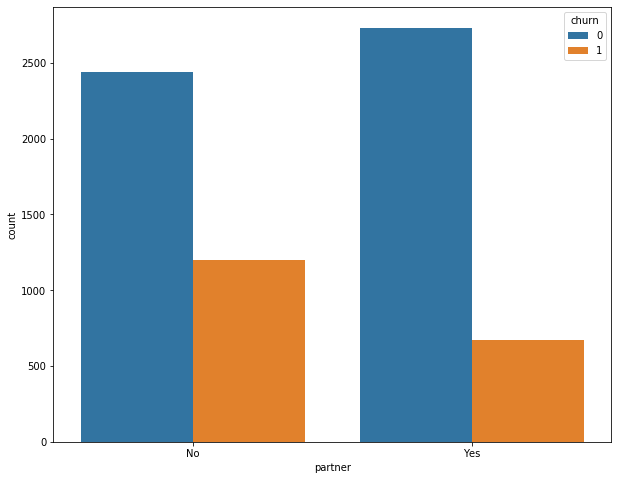

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(df.partner, hue=df.churn)

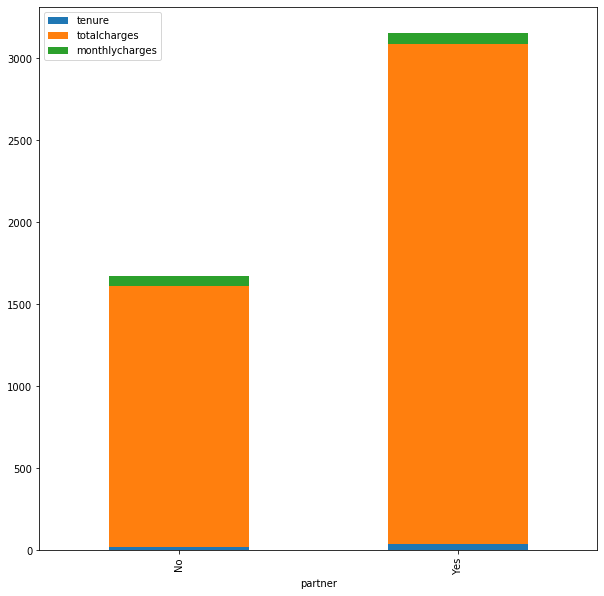

In [ ]:
partner_checks = df.groupby(['partner'])[['tenure','totalcharges','monthlycharges']].mean().plot(kind='bar',stacked=True,figsize=(10,10))
partner_checks

**Note : total charges paling banyak berada pada customer yang memiliki partner**

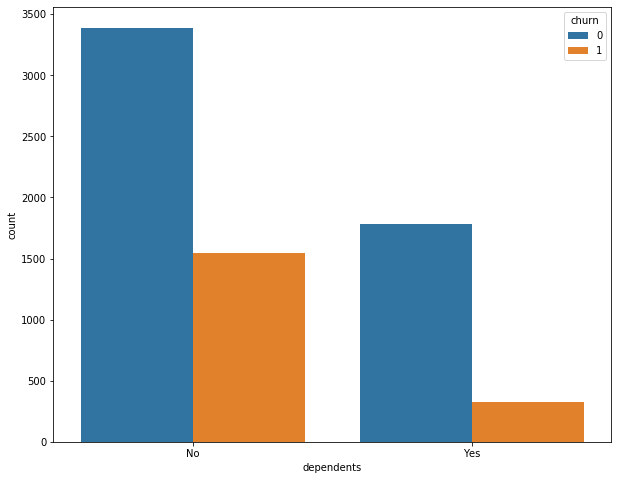

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(df.dependents, hue=df.churn)

In [ ]:
pd.crosstab(df.churn,df.dependents,margins=True)

dependents,No,Yes,All
churn,,,
0,3390,1784,5174
1,1543,326,1869
All,4933,2110,7043


In [ ]:
print ('jumlah customer yang memiliki dependents(family member) dan churn adalah sekitar {}%'.format(326/2110*100))
print ('jumlah customer yang tidak memiliki dependents(family member) dan churn adalah sekitar {}%'.format(1543/4933*100))

jumlah customer yang memiliki dependents(family member) dan churn adalah sekitar 15.450236966824646%
jumlah customer yang tidak memiliki dependents(family member) dan churn adalah sekitar 31.279140482465028%


**Note : customer yang churn biasanya tidak memiliki dependents(family member)**

### Product

In [ ]:
df.describe(include=object)

,customerid,region,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,2,2,3,3,3,3,3,3,3,3,2,4
top,7730-CLDSV,Germany,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check
freq,1,6761,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,4171,2365


### #1. phone Service

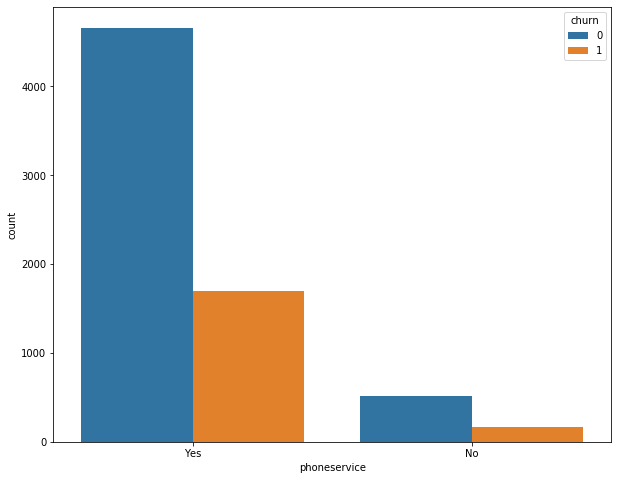

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(df.phoneservice, hue=df.churn)

In [ ]:
pd.crosstab(df.churn, df.phoneservice, margins=True)

phoneservice,No,Yes,All
churn,,,
0,512,4662,5174
1,170,1699,1869
All,682,6361,7043


In [ ]:
print ('customer yang churn dengan phone service adalah  {}%'.format(1699/6361*100))
print ('customer yang churn dengan no phone service {}%'.format(170/682*100))

customer yang churn dengan phone service adalah  26.70963684955196%
customer yang churn dengan no phone service 24.926686217008797%


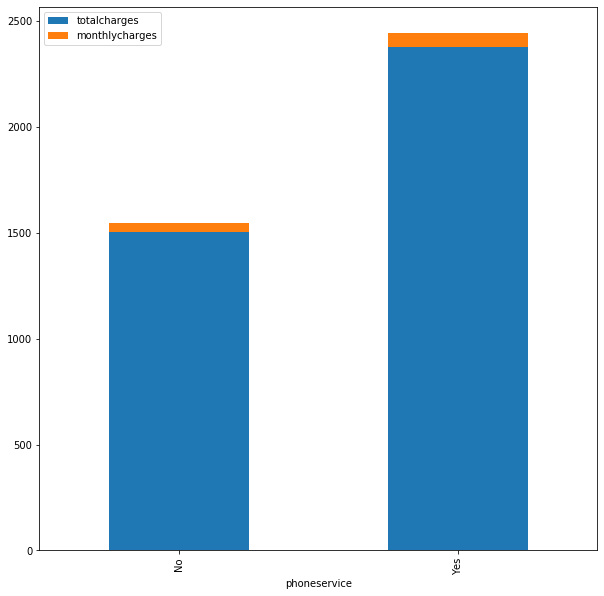

In [ ]:
internet_checks = df.groupby(['phoneservice'])[['totalcharges','monthlycharges']].mean().plot(kind='bar',stacked=True,figsize=(10,10))
internet_checks

**Note : banyak cutomer yang memilih phone service churn, karena total charge dan monthly charges yang tinggi dibanding no phone service**

### #2.Multiple Lines

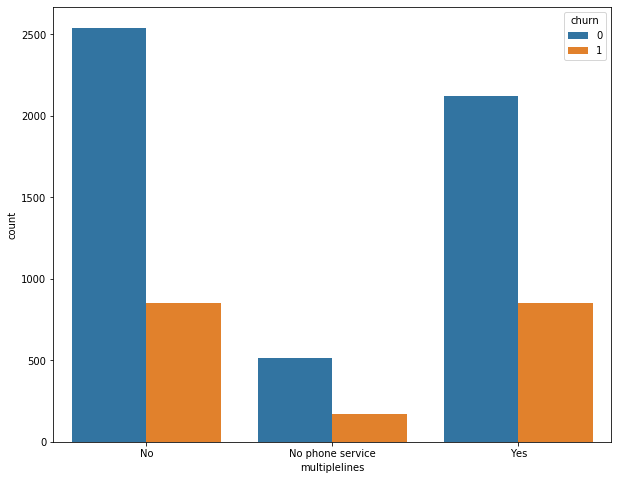

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(df.multiplelines, hue=df.churn)

In [ ]:
pd.crosstab(df.churn, df.multiplelines, margins=True)

multiplelines,No,No phone service,Yes,All
churn,,,,
0,2541,512,2121,5174
1,849,170,850,1869
All,3390,682,2971,7043


In [ ]:
print ('customer yang churn menggunakan multiple lines adalah  {}%'.format(850/2971*100))
print ('customer yang churn dengan no phone service {}%'.format(170/682*100))
print ('customer yang churn tanpa menggunakan multiple lines adalah  {}%'.format(849/3390*100))

customer yang churn menggunakan multiple lines adalah  28.6098956580276%
customer yang churn dengan no phone service 24.926686217008797%
customer yang churn tanpa menggunakan multiple lines adalah  25.04424778761062%


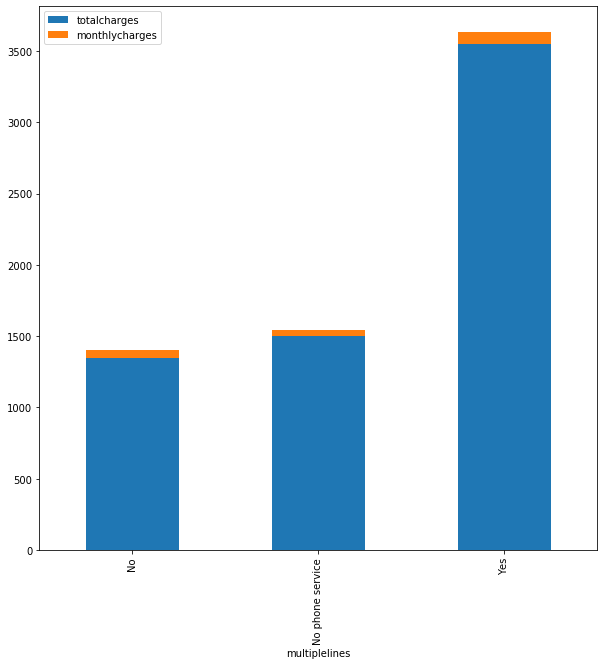

In [ ]:
internet_checks = df.groupby(['multiplelines'])[['totalcharges','monthlycharges']].mean().plot(kind='bar',stacked=True,figsize=(10,10))
internet_checks

**Note : customer yang churn cenderung menggunakan multiple lines**

### #3. Internet Service

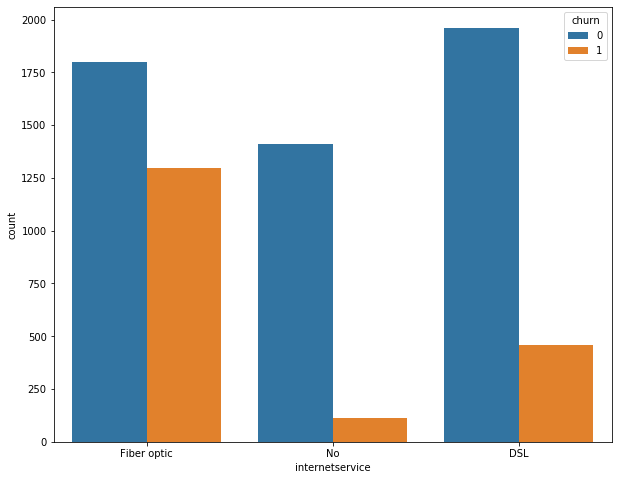

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(df.internetservice, hue=df.churn)

In [ ]:
pd.crosstab(df.churn, df.internetservice, margins=True)

internetservice,DSL,Fiber optic,No,All
churn,,,,
0,1962,1799,1413,5174
1,459,1297,113,1869
All,2421,3096,1526,7043


In [ ]:
print ('customer yang churn dengan fiber optic adalah  {}%'.format(1297/3096*100))
print ('customer yang churn dengan DSL adalah {}%'.format(459/2421*100))
print ('customer yang churn tanpa internet service adalah {}%'.format(113/1526*100))

customer yang churn dengan fiber optic adalah  41.89276485788114%
customer yang churn dengan DSL adalah 18.95910780669145%
customer yang churn tanpa internet service adalah 7.404980340760157%


In [ ]:
df['internetservice'].value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: internetservice, dtype: float64

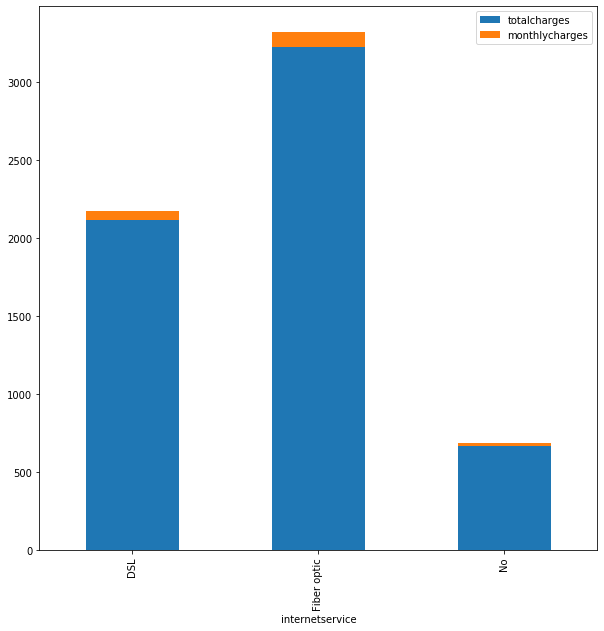

In [ ]:
internet_checks = df.groupby(['internetservice'])[['totalcharges','monthlycharges']].mean().plot(kind='bar',stacked=True,figsize=(10,10))
internet_checks

**Note**
1. Jumlah yang tidak menggunakan internet service sekitar 21%
2. customer yang churn cenderung kepada pengguna fiber optic dibandingkan DSL.
3. total charges dan monthlycharges pada fiber optic tinggi dibandingkan yang lainnya.

In [ ]:
# additional Value
coloms = ['onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingmovies','streamingtv']
df1 = pd.melt(df[df['internetservice']!= 'No'][coloms]).rename({'value':'Has service'}, axis =1)
df1

,variable,Has service
0,onlinesecurity,No
1,onlinesecurity,No
2,onlinesecurity,No
3,onlinesecurity,No
4,onlinesecurity,No
...,...,...
33097,streamingtv,Yes
33098,streamingtv,Yes
33099,streamingtv,No
33100,streamingtv,Yes


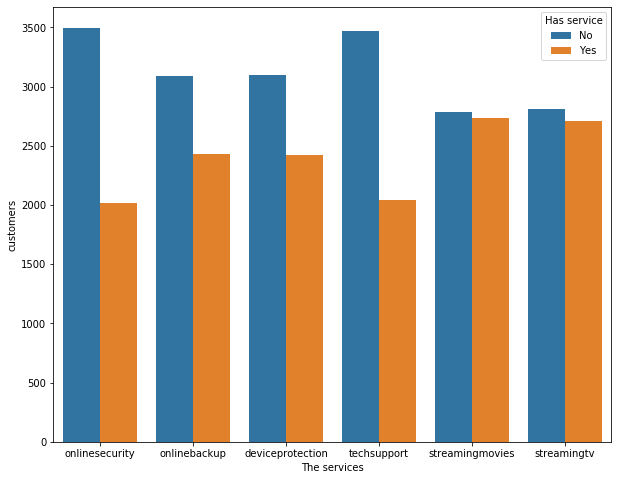

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='The services', ylabel='customers')
plt.show()

In [ ]:
df1 = df[(df.internetservice != 'No') & (df.churn == 1)]
df1 = pd.melt(df1[coloms]).rename({'value': 'Has service'}, axis=1)
df1

,variable,Has service
0,onlinesecurity,No
1,onlinesecurity,No
2,onlinesecurity,No
3,onlinesecurity,No
4,onlinesecurity,No
...,...,...
10531,streamingtv,Yes
10532,streamingtv,Yes
10533,streamingtv,Yes
10534,streamingtv,Yes


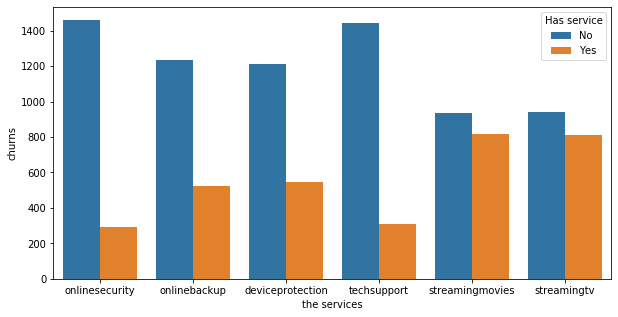

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='the services', ylabel='churns')
plt.show()

**Note :**
1. pada beberapa feature service ( online security, online backup, device protection, tech support) sepertinya tidak cenderung untuk churn
2. pada feature streaming tingkat churn hampir sama dengan tidak churn.

In [ ]:
#paperlessbilling

In [ ]:
df['paperlessbilling'].value_counts(normalize=True)

Yes    0.592219
No     0.407781
Name: paperlessbilling, dtype: float64

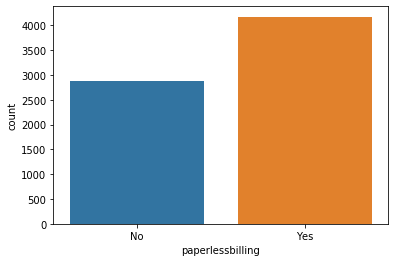

In [ ]:
sns.countplot(df['paperlessbilling'])

In [ ]:
pd.crosstab(df.churn, df.paperlessbilling, margins=True)

paperlessbilling,No,Yes,All
churn,,,
0,2403,2771,5174
1,469,1400,1869
All,2872,4171,7043


In [ ]:
print ('customer yang churn dengan menggunakan paperlessbilling adalah  {}%'.format(1400/4171*100))
print ('customer yang churn dengan non-paperlessbilling adalah  {}%'.format(469/2872*100))

customer yang churn dengan menggunakan paperlessbilling adalah  33.565092304003834%
customer yang churn dengan non-paperlessbilling adalah  16.33008356545961%


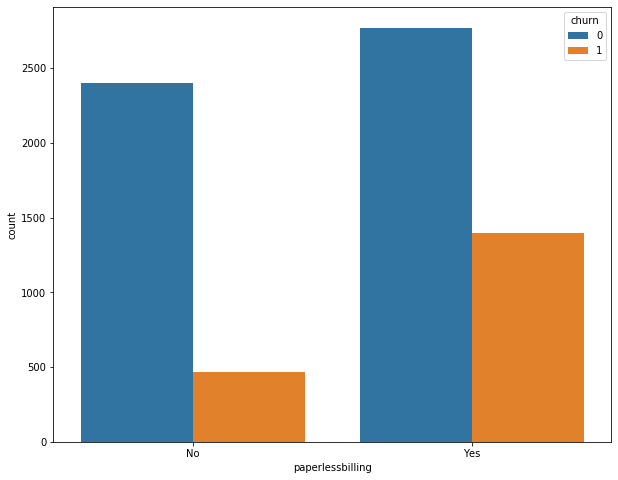

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(df.paperlessbilling, hue=df.churn)

**Note: customer yang menggunakan paperless billing punya kecenderungan untuk churn**

In [ ]:
#payment method

In [ ]:
df['paymentmethod'].value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: paymentmethod, dtype: float64

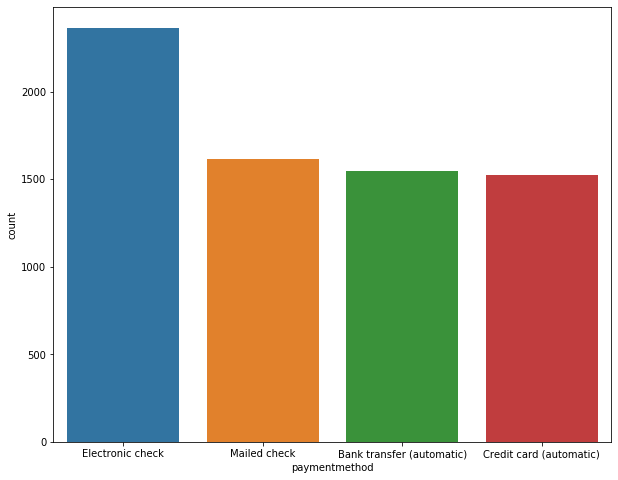

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df['paymentmethod'])

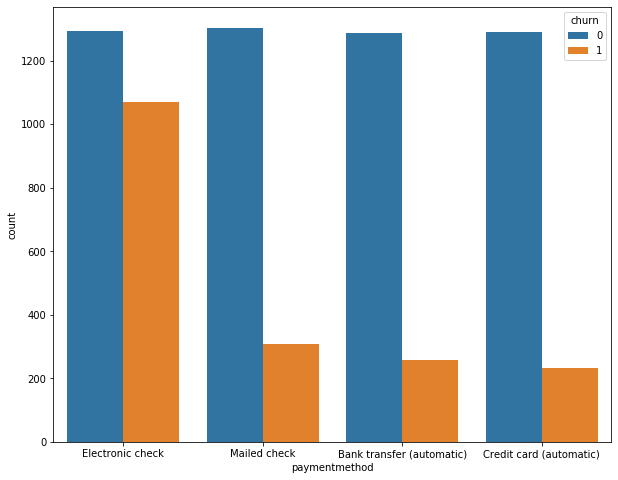

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df.paymentmethod, hue=df.churn)

**Note**
1. paling banyak menggunakan electronic check
2. churn paling banyak juga menggunakan electronick check
3. churn yang sedikit biasanya menggunakan bank transfer atau credit card

# **Data Preparation**

## encode

In [ ]:
## #1. label encode

In [ ]:
df.head(2)

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,No,Electronic check,12.0,12.0,0
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.0,13.0,0


In [ ]:
df.drop(columns=['customerid'], inplace=True)

In [ ]:
df.head(2)

,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,France,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,No,Electronic check,12.0,12.0,0
1,France,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.0,13.0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encodes = ['partner','paperlessbilling','dependents','phoneservice','gender']

le = LabelEncoder()

for kolom in label_encodes:
    df[kolom] = le.fit_transform(df[kolom])


In [ ]:
df.head()

,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,France,1,1,0,0,1,1,No,Fiber optic,No,No,No,Yes,No,No,0,Electronic check,12.00,12.00,0
1,France,0,0,1,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,Electronic check,13.00,13.00,0
2,Germany,1,0,1,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,Mailed check,18.80,18.80,0
3,Germany,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,Electronic check,18.85,18.85,0
4,Germany,1,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,Mailed check,18.85,18.85,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   int32  
 4   dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   int32  
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  paperlessbilling  7043 non-null   int32  
 16  paymentmethod     7043 non-null   object 


### One Hot

In [ ]:
df = pd.get_dummies(df, columns=['region','internetservice','paymentmethod','onlinesecurity','onlinebackup','deviceprotection','multiplelines','techsupport','streamingmovies','streamingtv'])

In [ ]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,...,multiplelines_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes
0,1,1,0,0,1,1,0,12.00,12.00,0,...,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,1,1,0,13.00,13.00,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,1,1,1,1,0,18.80,18.80,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,0,1,1,0,18.85,18.85,0,...,0,0,1,0,0,1,0,0,1,0
4,1,0,0,0,1,1,1,18.85,18.85,1,...,0,0,1,0,0,1,0,0,1,0


# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale = MinMaxScaler()

df['monthlycharges'] = scale.fit_transform(np.array(df['monthlycharges']).reshape(-1,1))
df['totalcharges'] = scale.fit_transform(np.array(df['totalcharges']).reshape(-1,1))

In [ ]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,...,multiplelines_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes
0,1,1,0,0,1,1,0,0.000000,0.000000,0,...,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,1,1,0,0.009368,0.000045,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,1,1,1,1,0,0.063700,0.000304,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,0,1,1,0,0.064169,0.000307,0,...,0,0,1,0,0,1,0,0,1,0
4,1,0,0,0,1,1,1,0.064169,0.000307,1,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
y = df['churn'] #sebagai label
X = df.drop(columns=['churn']) #sebagai fitur

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Modeling and Evaluation

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train,y_train)

C:\Users\niken\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

Text(0.5, 1.0, 'confusion matrix logreg')

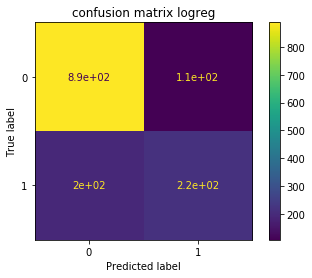

In [ ]:
plot_confusion_matrix(log_reg,X_test,y_test)
plt.title('confusion matrix logreg')

In [ ]:
log_reg_predict = log_reg.predict(X_test)
print (log_reg_predict)

[1 1 0 ... 0 0 0]


In [ ]:
print (classification_report(y_test,log_reg_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       995
           1       0.67      0.53      0.59       414

    accuracy                           0.79      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
print (roc_auc_score(y_test,log_reg_predict))

0.710018692496298


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Text(0.5, 1.0, 'confussion matrix KNN')

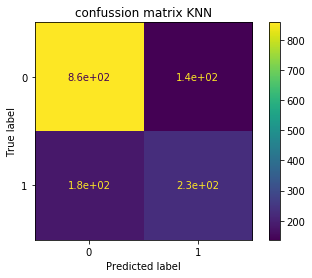

In [ ]:
plot_confusion_matrix(neigh,X_test,y_test) #memprediksi dengan labelnya
plt.title("confussion matrix KNN")

In [ ]:
knn_predict = neigh.predict(X_test)

In [ ]:
print (classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       995
           1       0.63      0.56      0.59       414

    accuracy                           0.77      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.77      0.77      0.77      1409



In [ ]:
print (roc_auc_score(y_test,knn_predict))

0.7089335566722502


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 1.0, 'confussion matrix tree')

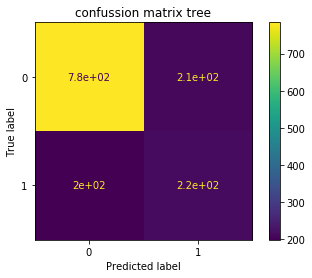

In [ ]:
#prediction
plot_confusion_matrix(tree,X_test,y_test) #memprediksi dengan labelnya
plt.title("confussion matrix tree")

In [ ]:
tree_predict = tree.predict(X_test)

In [ ]:
print (classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       995
           1       0.50      0.52      0.51       414

    accuracy                           0.71      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.71      0.71      0.71      1409



In [ ]:
print (roc_auc_score(y_test,tree_predict))

0.6536316849950234
